# Decay Spectra

## Imports

In [1]:
from hazma.decay import muon as decay_muon
from hazma.decay import neutral_pion as decay_neutral_pion
from hazma.decay import charged_pion as decay_charged_pion
from hazma.decay import charged_kaon as decay_charged_kaon
from hazma.decay import long_kaon as decay_long_kaon
from hazma.decay import short_kaon as decay_short_kaon

from hazma.parameters import muon_mass as mmu
from hazma.parameters import neutral_pion_mass as mpi0
from hazma.parameters import charged_pion_mass as mpi
from hazma.parameters import charged_kaon_mass as mk
from hazma.parameters import neutral_kaon_mass as mk0

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Muon

In [9]:
nengs = 150
mu_engs = np.array([mmu, 2 * mmu, 3. * mmu])
egams = np.logspace(0., np.log10(500.), num=nengs)

mu_specs = np.array([decay_muon(egams, emu) for emu in mu_engs])

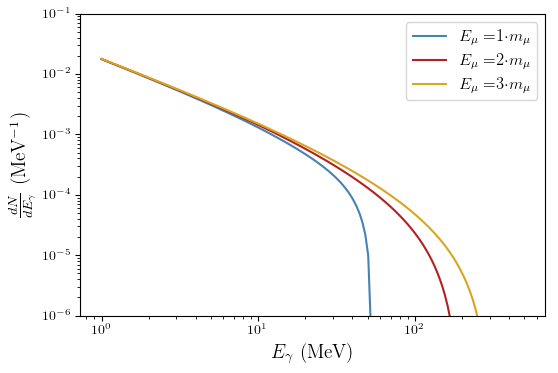

In [29]:
plt.figure(dpi=100)

for i in range(len(mu_engs)):
    plt.loglog(egams, mu_specs[i], label=r"$E_{\mu} = $" + "{:0.0f}".format(mu_engs[i] / mmu) + r"$\cdot m_{\mu}$")
    

plt.ylim([10**-6, 10**-1])
plt.ylabel(r"$\frac{dN}{dE_{\gamma}}$ (MeV$^{-1}$)", fontsize=14)
plt.xlabel(r"$E_{\gamma}$ (MeV)", fontsize=14)
plt.legend(fontsize=12)

## Neutral Pion

In [31]:
nengs = 150
pi0_engs = np.array([1.01 * mpi0, 2 * mpi0, 3. * mpi0])
egams = np.logspace(0., np.log10(1000.), num=nengs)

pi0_specs = np.array([decay_neutral_pion(egams, epi) for epi in pi0_engs])

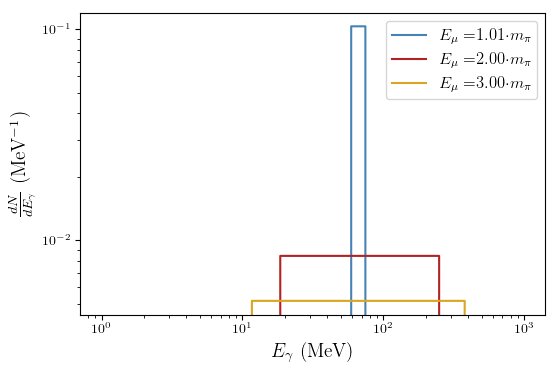

In [37]:
plt.figure(dpi=100)

for i in range(len(pi0_engs)):
    plt.loglog(egams, pi0_specs[i], label=r"$E_{\mu} = $" + "{:0.2f}".format(pi0_engs[i] / mpi0) + r"$\cdot m_{\pi}$")
    

#plt.ylim([10**-6, 10**-1])
plt.ylabel(r"$\frac{dN}{dE_{\gamma}}$ (MeV$^{-1}$)", fontsize=14)
plt.xlabel(r"$E_{\gamma}$ (MeV)", fontsize=14)
plt.legend(fontsize=12)

## Charged Pion

### Different channels

In [2]:
nengs = 150
egams = np.logspace(0., np.log10(1500.), num=nengs)

cp_specs_total = decay_charged_pion(egams, mpi, mode="total")
cp_specs_munu = decay_charged_pion(egams, mpi, mode="munu")
cp_specs_munug = decay_charged_pion(egams, mpi, mode="munug")
cp_specs_enug = decay_charged_pion(egams, mpi, mode="enug")


cp_specs = {"total" : cp_specs_total,
            "munu" : cp_specs_munu,
            "munug" : cp_specs_munug, 
            "enug" : cp_specs_enug}

In [3]:
def cp_key_to_label(key):
    if key =="total":
        return "Total"
    if key =="munu":
        return r"$\mu^{+}\nu$"
    if key =="munug": 
        return r"$\mu^{+}\nu\gamma$"
    if key =="enug":
        return r"$e^{+}\nu\gamma$"

In [4]:
decay_charged_pion(egams, mpi, mode="enug")

array([  1.80983793e-04,   1.72177579e-04,   1.63793269e-04,
         1.55810661e-04,   1.48210521e-04,   1.40974536e-04,
         1.34085271e-04,   1.27526126e-04,   1.21281296e-04,
         1.15335735e-04,   1.09675117e-04,   1.04285802e-04,
         9.91548042e-05,   9.42697612e-05,   8.96189023e-05,
         8.51910210e-05,   8.09754486e-05,   7.69620277e-05,
         7.31410880e-05,   6.95034231e-05,   6.60402683e-05,
         6.27432794e-05,   5.96045126e-05,   5.66164055e-05,
         5.37717587e-05,   5.10637186e-05,   4.84857608e-05,
         4.60316745e-05,   4.36955476e-05,   4.14717523e-05,
         3.93549316e-05,   3.73399864e-05,   3.54220637e-05,
         3.35965440e-05,   3.18590311e-05,   3.02053412e-05,
         2.86314927e-05,   2.71336970e-05,   2.57083493e-05,
         2.43520198e-05,   2.30614457e-05,   2.18335236e-05,
         2.06653017e-05,   1.95539732e-05,   1.84968694e-05,
         1.74914534e-05,   1.65353144e-05,   1.56261618e-05,
         1.47618199e-05,

In [6]:
1.23e-4

0.000123

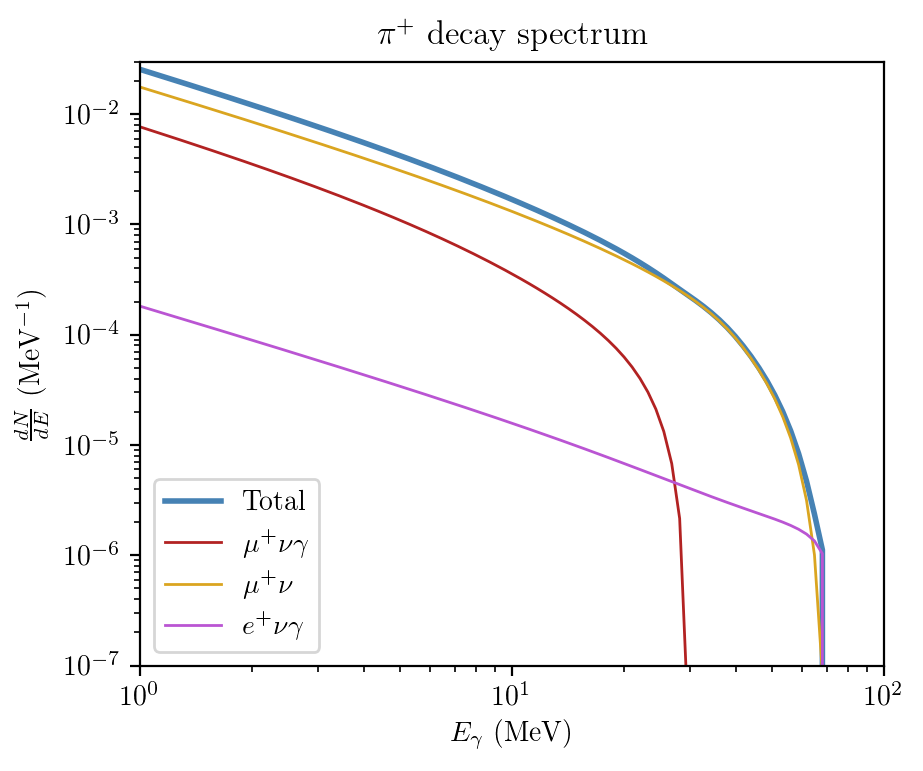

In [9]:
plt.figure(dpi=200)

ax = plt.subplot(111)

for key in reversed(sorted(cp_specs.keys())):
    plt.loglog(egams, cp_specs[key], label=cp_key_to_label(key), lw=2 if key=="total" else 1)


plt.xlim([10**0,10**2])
plt.ylim([1e-7, 3e-2])
plt.ylabel(r"$\frac{dN}{dE}$ (MeV$^{-1}$)")
plt.xlabel(r"$E_{\gamma}$ (MeV)")
plt.title(r"$\pi^{+}$ decay spectrum")

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc=3)

plt.savefig("figures/cpion_decay_spectrum.pdf")

### Difference pion energies

In [35]:
nengs = 150
pi_engs = np.array([mpi, 2 * mpi, 3. * mpi])
egams = np.logspace(0., np.log10(1000.), num=nengs)

pi_specs = np.array([decay_charged_pion(egams, epi) for epi in pi_engs])

/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


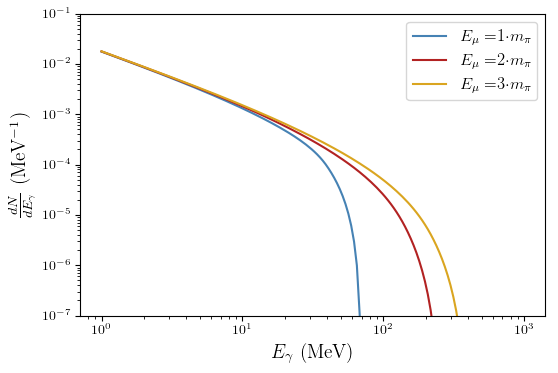

In [39]:
plt.figure(dpi=100)

for i in range(len(pi0_engs)):
    plt.loglog(egams, pi_specs[i], label=r"$E_{\mu} = $" + "{:0.0f}".format(pi_engs[i] / mpi) + r"$\cdot m_{\pi}$")
    

plt.ylim([10**-7, 10**-1])
plt.ylabel(r"$\frac{dN}{dE_{\gamma}}$ (MeV$^{-1}$)", fontsize=14)
plt.xlabel(r"$E_{\gamma}$ (MeV)", fontsize=14)
plt.legend(fontsize=12)

## Charged Kaon

In [30]:
nengs = 150
egams = np.logspace(0., np.log10(1500.), num=nengs)

ck_specs_total = decay_charged_kaon(egams, mk, mode="total")
ck_specs_0enu = decay_charged_kaon(egams, mk, mode="0enu")
ck_specs_0munu = decay_charged_kaon(egams, mk, mode="0munu")
ck_specs_00p = decay_charged_kaon(egams, mk, mode="00p")
ck_specs_mmug = decay_charged_kaon(egams, mk, mode="mmug")
ck_specs_munu = decay_charged_kaon(egams, mk, mode="munu")
ck_specs_p0 = decay_charged_kaon(egams, mk, mode="p0")
ck_specs_p0g = decay_charged_kaon(egams, mk, mode="p0g")
ck_specs_ppm = decay_charged_kaon(egams, mk, mode="ppm")

ck_specs = {"total" : ck_specs_total,
            "0enu" : ck_specs_0enu,
            "0munu" : ck_specs_0munu, 
            "00p" : ck_specs_00p, 
            "mmug" : ck_specs_mmug, 
            "munu" : ck_specs_munu, 
            "p0" : ck_specs_p0, 
            "p0g" : ck_specs_p0g,
            "ppm" : ck_specs_ppm}

In [31]:
def ck_key_to_label(key):
    if key =="total":
        return "Total"
    if key =="0enu":
        return r"$\pi^{0}e^{+}\nu$"
    if key =="0munu": 
        return r"$\pi^{0}\mu^{+}\nu$"
    if key =="00p":
        return r"$\pi^{0}\pi^{0}\pi^{+}$"
    if key =="mmug":
        return r"$\mu^{+}\nu\gamma$"
    if key =="munu":
        return r"$\mu^{+}\nu$"
    if key =="p0":
        return r"$\pi^{+}\pi^{0}$"
    if key =="p0g":
        return r"$\pi^{+}\pi^{0}\gamma$"
    if key =="ppm":
        return r"$\pi^{+}\pi^{+}\pi^{-}$"

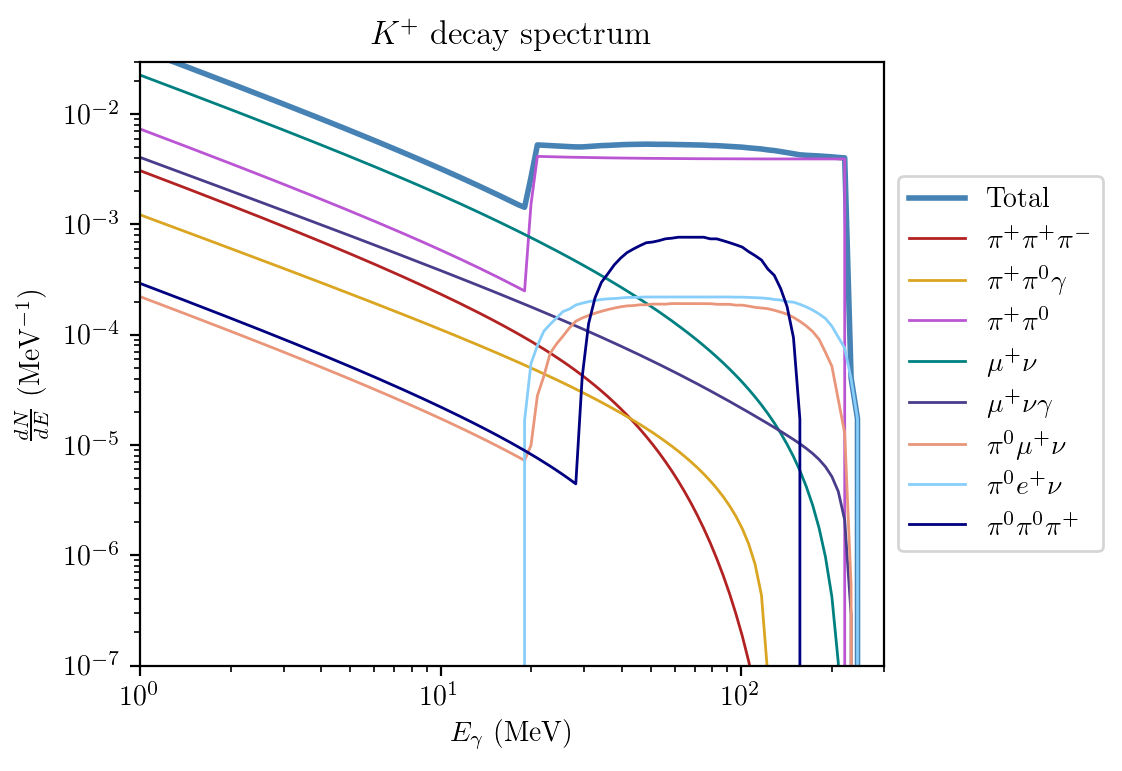

In [32]:
plt.figure(dpi=200)

ax = plt.subplot(111)

for key in reversed(sorted(ck_specs.keys())):
    plt.loglog(egams, ck_specs[key], label=ck_key_to_label(key), lw=2 if key=="total" else 1)


plt.xlim([10**0,3*10**2])
plt.ylim([1e-7, 3e-2])
plt.ylabel(r"$\frac{dN}{dE}$ (MeV$^{-1}$)")
plt.xlabel(r"$E_{\gamma}$ (MeV)")
plt.title(r"$K^{+}$ decay spectrum")

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("figures/ckaon_decay_spectrum.pdf")

## Short Kaon

In [33]:
nengs = 150
egams = np.logspace(0., np.log10(1500.), num=nengs)

sk_specs_total = decay_short_kaon(egams, mk0, mode="total")
sk_specs_00 = decay_short_kaon(egams, mk0, mode="00")
sk_specs_pm = decay_short_kaon(egams, mk0, mode="pm")
sk_specs_pmg = decay_short_kaon(egams, mk0, mode="pmg")

sk_specs = {"total" : sk_specs_total,
            "00" : sk_specs_00,
            "pm" : sk_specs_pm, 
            "pmg" : sk_specs_pmg}

In [34]:
def sk_key_to_label(key):
    if key =="total":
        return "Total"
    if key =="00":
        return r"$\pi^{0}\pi^{0}$"
    if key =="pm": 
        return r"$\pi^{+}\pi^{-}$"
    if key =="pmg":
        return r"$\pi^{+}\pi^{-}\gamma$"

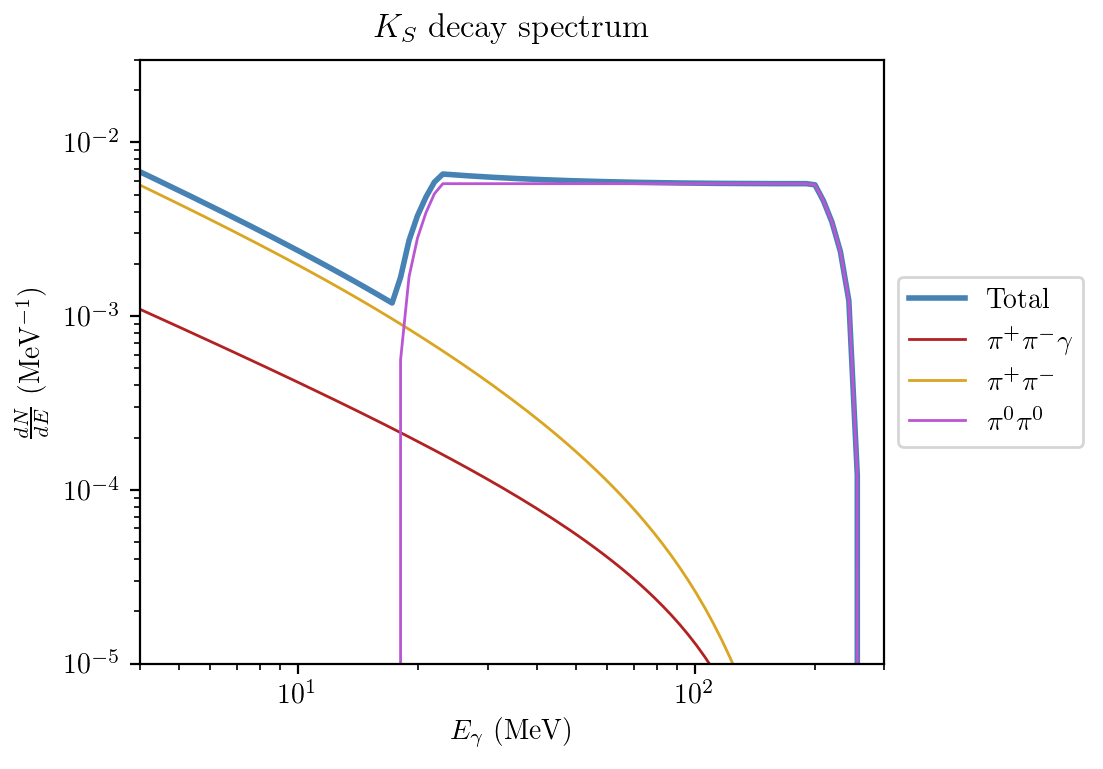

In [35]:
plt.figure(dpi=200)

ax = plt.subplot(111)

for key in reversed(sorted(sk_specs.keys())):
    plt.loglog(egams, sk_specs[key], label=sk_key_to_label(key), lw=2 if key=="total" else 1)


plt.xlim([4e0,3e2])
plt.ylim([1e-5, 3e-2])
plt.ylabel(r"$\frac{dN}{dE}$ (MeV$^{-1}$)")
plt.xlabel(r"$E_{\gamma}$ (MeV)")
plt.title(r"$K_{S}$ decay spectrum")

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("figures/skaon_decay_spectrum.pdf")

## Long Kaon

In [36]:
nengs = 150
egams = np.logspace(0., np.log10(1500.), num=nengs)

lk_specs_total = decay_long_kaon(egams, mk0, mode="total")
lk_specs_000 = decay_long_kaon(egams, mk0, mode="000")
lk_specs_penu = decay_long_kaon(egams, mk0, mode="penu")
lk_specs_penug = decay_long_kaon(egams, mk0, mode="penug")
lk_specs_pm0 = decay_long_kaon(egams, mk0, mode="pm0")
lk_specs_pm0g = decay_long_kaon(egams, mk0, mode="pm0g")
lk_specs_pmunu = decay_long_kaon(egams, mk0, mode="pmunu")
lk_specs_pmunug = decay_long_kaon(egams, mk0, mode="pmunug")

lk_specs = {"total" : lk_specs_total,
            "000" : lk_specs_000,
            "penu" : lk_specs_penu, 
            "penug" : lk_specs_penug, 
            "pm0" : lk_specs_pm0, 
            "pm0g" : lk_specs_pm0g, 
            "pmunu" : lk_specs_pmunu, 
            "pmunug" : lk_specs_pmunug}

In [37]:
def lk_key_to_label(key):
    if key =="total":
        return "Total"
    if key =="000":
        return r"$\pi^{0}\pi^{0}\pi^{0}$"
    if key =="penu": 
        return r"$\pi^{-}e^{+}\nu$"
    if key =="penug":
        return r"$\pi^{-}e^{+}\nu\gamma$"
    if key =="pm0":
        return r"$\pi^{+}\pi^{-}\pi^{0}$"
    if key =="pm0g":
        return r"$\pi^{+}\pi^{-}\pi^{0}\gamma$"
    if key =="pmunu":
        return r"$\pi^{-}\mu^{+}\nu$"
    if key =="pmunug":
        return r"$\pi^{-}\mu^{+}\nu\gamma$"

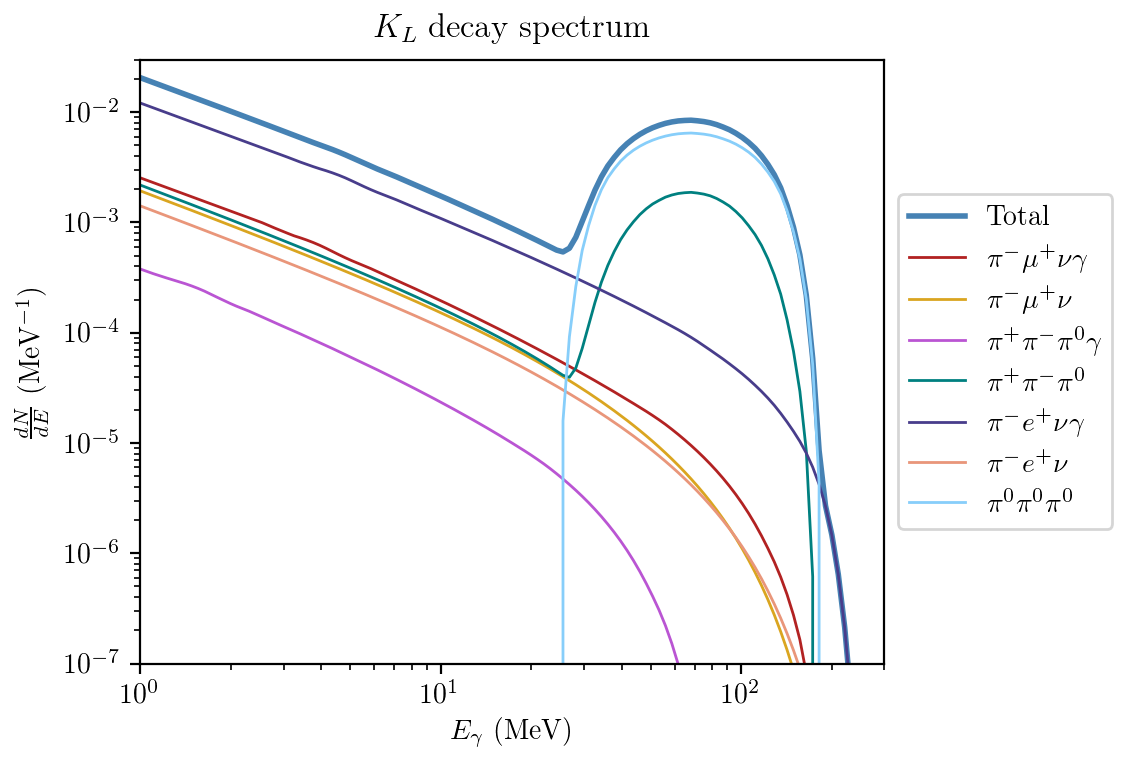

In [38]:
plt.figure(dpi=200)

ax = plt.subplot(111)

for key in reversed(sorted(lk_specs.keys())):
    plt.loglog(egams, lk_specs[key], label=lk_key_to_label(key), lw=2 if key=="total" else 1)


plt.xlim([10**0,3*10**2])
plt.ylim([1e-7, 3e-2])
plt.ylabel(r"$\frac{dN}{dE}$ (MeV$^{-1}$)")
plt.xlabel(r"$E_{\gamma}$ (MeV)")
plt.title(r"$K_{L}$ decay spectrum")

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("figures/lkaon_decay_spectrum.pdf")